In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import auctiondates.auctionFileProcessing as afp

%load_ext autoreload
%autoreload 2

AUCTION_FILENAME = r"auctiondates/UST Auction All Data_20230313.csv"
auction_data = afp.loadJPMFullAuctionTable(AUCTION_FILENAME)
twos = afp.pdGetOneAuctionResults(auction_data, 2)
fives = afp.pdGetOneAuctionResults(auction_data, 5)
display(twos)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,bond_series,num_auctions,2Y Tail,2Y BC,2Y Indirect,2Y Direct,2Y Reopening,2Y SOMA,2Y DepInsts,2Y Individuals,2Y Dealers,2Y Pensions,2Y Investments,2Y Foreigns,2Y AuctionSize,2Y AuctionYield
Date,,,,,,,,,,,,,,,,
2018-03-26,[2Y],1.0,0.40,2.91000,44.53896,14.12026,1.0,14.97784,0.00250,1.07898,42.39884,0.00000,43.35062,13.13572,30.0,2.310
2018-04-24,[2Y],1.0,0.70,2.61000,41.55421,15.34964,1.0,11.31929,0.00938,1.16890,45.59632,0.00000,43.53669,9.66371,32.0,2.498
2018-05-22,[2Y],1.0,-0.10,2.88000,39.29309,15.34082,1.0,14.80055,0.00788,1.23503,46.34681,0.00000,41.69667,10.62270,33.0,2.590
2018-06-26,[2Y],1.0,0.40,2.73000,42.26628,15.40109,1.0,11.07484,0.00051,1.01181,44.96937,0.00000,43.72517,10.10194,34.0,2.538
2018-07-24,[2Y],1.0,0.30,2.92000,45.02715,14.28517,0.0,5.15056,0.00429,1.25189,42.04578,0.07143,48.35100,8.12132,35.0,2.657
2018-08-27,[2Y],1.0,0.30,2.89397,43.82247,13.67898,1.0,6.58494,0.00278,1.09196,43.61099,0.06945,42.70584,12.29673,36.0,2.655
2018-09-24,[2Y],1.0,0.70,2.44000,39.96429,13.40483,1.0,0.00000,0.00000,1.27262,47.84807,0.00000,44.15927,6.61191,37.0,2.829
2018-10-23,[2Y],1.0,0.10,2.67000,52.60676,5.49731,1.0,0.00000,0.00263,1.17179,43.36470,0.00000,38.85248,16.45945,38.0,2.880
2018-11-26,[2Y],1.0,0.10,2.65000,44.87536,19.48372,1.0,8.07256,0.00256,0.89537,36.86669,0.00000,40.91599,21.19118,39.0,2.836


In [2]:
SPREAD_FILENAME = r"transformers/transformer_data_tufv.csv"

tufv = pd.read_csv(SPREAD_FILENAME, index_col=0, parse_dates=[0])
tufv["Spread"] = tufv["close"]
tufv_spread = tufv[["Spread"]].dropna()
# tufv['Spread'] = tufv['target'].shift(-1)
# tufv_spread = tufv[['Spread']].dropna()
# tufv_spread = tufv_spread['Spread'].resample('D').last()

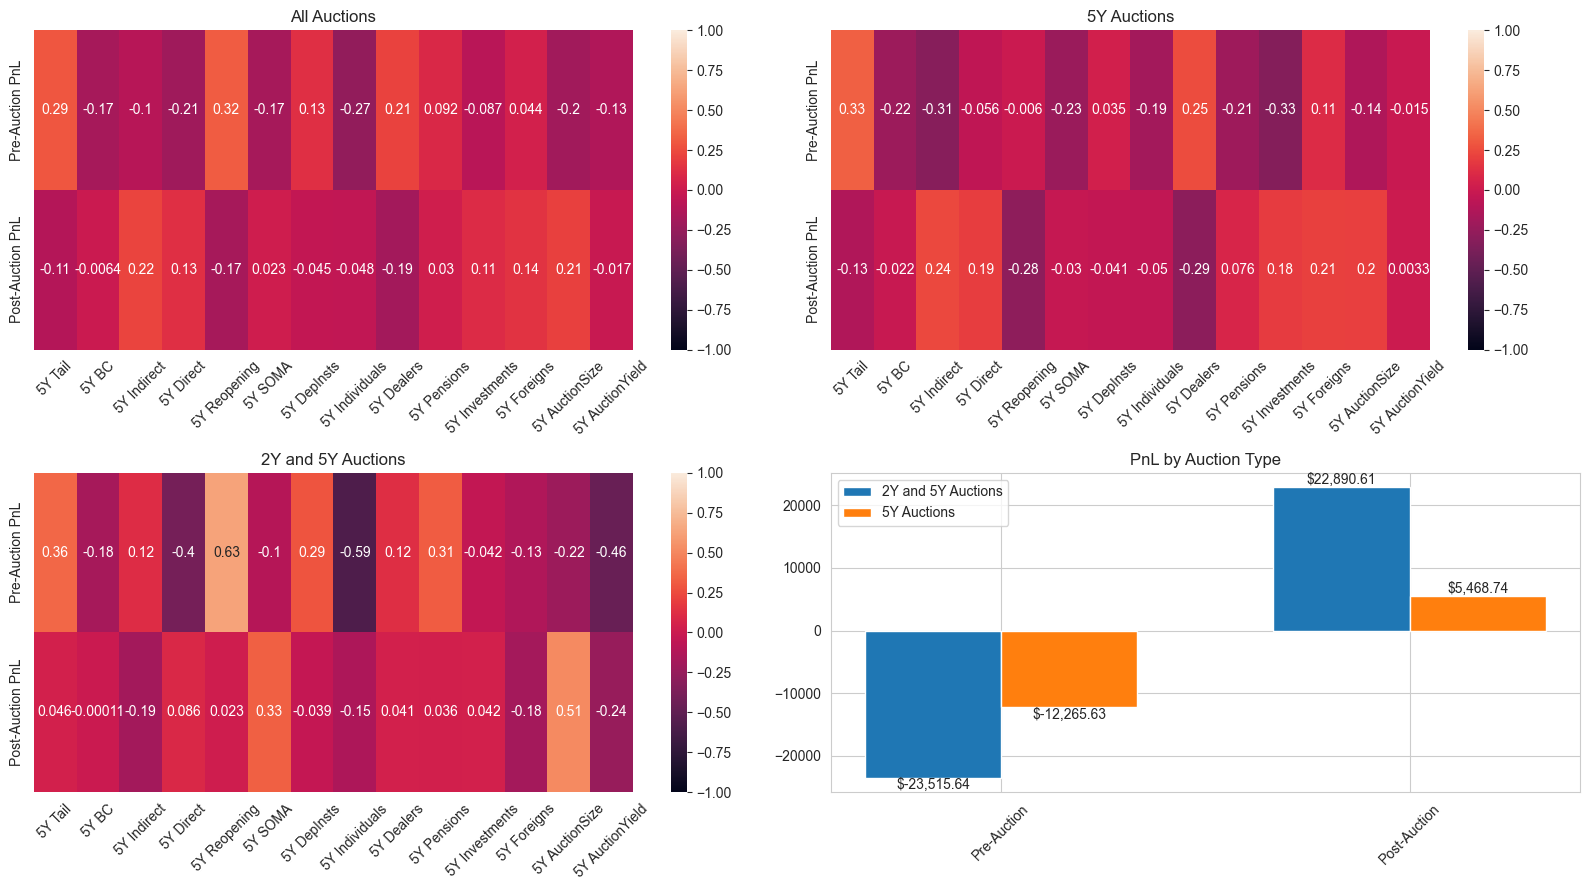

In [3]:
from auction_trading.pnl_calcs import calc_all_trades, plot_single_trade
import seaborn as sns

trades = calc_all_trades(tufv_spread, list(fives.index)[:50], 15, multiplier=10_000)
trades = pd.merge(trades, fives, left_index=True, right_index=True)

fig, axs = plt.subplots(2, 2, figsize=(16, 9))
corrs_all = trades.corr(numeric_only=True)
sns.heatmap(corrs_all.iloc[:2, 3:], annot=True, ax=axs[0, 0], vmin=-1, vmax=1)

# Filter trades to be 5Y or 2Y and 5Y
trades_5y = trades[trades["bond_series"].isin([["5Y"]])]
trades_2y5y = trades[trades["bond_series"].isin([["2Y", "5Y"]])]

# Plot correlations for 5Y trades
corrs_5y = trades_5y.corr(numeric_only=True)
sns.heatmap(corrs_5y.iloc[:2, 3:], annot=True, ax=axs[0, 1], vmin=-1, vmax=1)


# Plot correlations for 2Y and 5Y trades
corrs_2y5y = trades_2y5y.corr(numeric_only=True)
sns.heatmap(corrs_2y5y.iloc[:2, 3:], annot=True, ax=axs[1, 0], vmin=-1, vmax=1)

# Make rotations of ticks 45 degrees
for ax in axs.flat:
    ax.tick_params(axis="x", rotation=45)

# Set titles
axs[0, 0].set_title("All Auctions")
axs[0, 1].set_title("5Y Auctions")
axs[1, 0].set_title("2Y and 5Y Auctions")

# Get PnL by auction type
pnl_5yr_pre, pnl_5yr_post = (
    trades_5y["Pre-Auction PnL"].sum(),
    trades_5y["Post-Auction PnL"].sum(),
)
pnl_2y5y_pre, pnl_2y5y_post = (
    trades_2y5y["Pre-Auction PnL"].sum(),
    trades_2y5y["Post-Auction PnL"].sum(),
)

# Plot bar chart. Make the bars side by side.
width = 0.1
br1 = [0, 0.3]
br2 = [x + width for x in br1]

axs[1, 1].bar(br1, [pnl_2y5y_pre, pnl_5yr_pre], width=width, label="2Y and 5Y Auctions")
axs[1, 1].bar(br2, [pnl_2y5y_post, pnl_5yr_post], width=width, label="5Y Auctions")
axs[1, 1].set_xticks([x + width / 2 for x in br1])
axs[1, 1].set_xticklabels(["Pre-Auction", "Post-Auction"])

rects = axs[1, 1].patches
labels = [
    f"${i:,.2f}" for i in [pnl_2y5y_pre, pnl_5yr_pre, pnl_2y5y_post, pnl_5yr_post]
]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    if height > 0:
        axs[1, 1].text(
            rect.get_x() + rect.get_width() / 2,
            height + 7,
            label,
            ha="center",
            va="bottom",
        )
    else:
        axs[1, 1].text(
            rect.get_x() + rect.get_width() / 2,
            height - 7,
            label,
            ha="center",
            va="top",
        )

axs[1, 1].set_title("PnL by Auction Type")
axs[1, 1].legend()


fig.tight_layout()

plt.show()

In [149]:
from auction_trading.pnl_calcs import optimize_entry_time

def trade_rule(series):
    # Function to establish when to steepen and when
    # to flatten.
    if len(series) == 2:
        return ('steepener', 'steepener')
    else:
        return ('steepener', 'flattener')

df = pd.read_csv('data/USTFutures-UChicago.csv', index_col=0, parse_dates=[0])
print('~'*80)
print('Twos with Double Steepener on 2Y and 5Y Auctions')
opt = optimize_entry_time(df['C2'], twos, symmetric=False, trade_rule=trade_rule)
print('~'*80)
print('Fives with Double Steepener on 2Y and 5Y Auctions')
opt = optimize_entry_time(df['C5'], fives, symmetric=False, trade_rule=trade_rule)
print('~'*80)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Twos with Double Steepener on 2Y and 5Y Auctions
Optimal entry/exit time: 15.54 days before the auction and 17.14 days after the auction.
Pnl before auction: $4,112.50.
Pnl after auction: $8,321.87.
Pnl total: $12,434.38.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Fives with Double Steepener on 2Y and 5Y Auctions
Optimal entry/exit time: 5.63 days before the auction and 13.67 days after the auction.
Pnl before auction: $14,503.50.
Pnl after auction: $20,153.56.
Pnl total: $34,657.06.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
